# Sentiment Analysis on Twitter Data — Full Project

**Notebook:** `Sentiment_Analysis_on_Twitter_Data_Full_Project.ipynb`  
**Platform:** Google Colab (GPU-ready)  
**Dataset:** Generic Twitter Sentiment dataset (loaded from a GitHub CSV)  
**Visuals:** Seaborn + Matplotlib

This single notebook is structured into **15 sections (Weeks 1–15)** to match the workflow of the project.
GPU setup cells are included in Week 9/10 sections to accelerate deep learning training.

> Note: this notebook is a project for my DataScience & AI coursework


## Week 1 — Setup & Orientation

**Goals:** Install packages, load dataset preview, set up GPU check for Colab.

In [1]:
# Week 1: Setup & Orientation

# Install libraries commonly needed for the project
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn nltk tensorflow keras xgboost wordcloud shap lime

# Check GPU (Colab)
import os
print("Python version:", os.sys.version)
try:
    !nvidia-smi
except:
    print("No GPU detected (or nvidia-smi not available). Colab GPU runtime recommended for DL sections.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# GitHub raw CSV link (generic tweets dataset)
DATA_URL = "https://raw.githubusercontent.com/HarshalSanap/Twitter-Text-Mining/master/twittersubset.csv"

# Load a small preview first
df_preview = pd.read_csv(DATA_URL, encoding='latin1', nrows=10)
df_preview

,Unnamed: 0,Sentiment,Text
0,1,Negative,"@Schofe yeah me too diversity all the way, i ..."
1,2,Negative,Planning a roadtrip to Chitown b/c Iowa is tot...
2,3,Negative,well imm off to bed all goodnight have a great...
3,4,Negative,@_Idance_ ME TOO!!!!! its horrible...and by ...
4,5,Negative,bummed i didnt get to see manchester orchestra...
5,6,Negative,im here really looking forward to summer but n...
6,7,Negative,Runs House is on-please tune in! JoJo's in hot...
7,8,Negative,"@maurae Awesome and readable, yes Too bad my ..."
8,9,Negative,Its 5:42AM &amp; I'm just now going to bed. Wh...
9,10,Negative,i HATE wrking on saturdays


## Week 2 — Data Collection & Cleaning

**Goals:** Load full dataset, inspect columns, handle missing values and duplicates, basic text cleaning.

In [3]:
# Week 2: Load full dataset
df = pd.read_csv(DATA_URL, encoding='latin1')
print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head(5))

Dataset shape: (51800, 3)
Columns: ['Unnamed: 0', 'Sentiment', 'Text']


,Unnamed: 0,Sentiment,Text
0,1,Negative,"@Schofe yeah me too diversity all the way, i ..."
1,2,Negative,Planning a roadtrip to Chitown b/c Iowa is tot...
2,3,Negative,well imm off to bed all goodnight have a great...
3,4,Negative,@_Idance_ ME TOO!!!!! its horrible...and by ...
4,5,Negative,bummed i didnt get to see manchester orchestra...


In [4]:
# Basic checks: missing values and duplicates
print("Missing values per column:\n", df.isna().sum())
print("\nDuplicate rows:", df.duplicated().sum())

Missing values per column:
 Unnamed: 0    0
Sentiment     0
Text          0
dtype: int64

Duplicate rows: 0


In [5]:
# Basic text cleaning function (examples). We'll create a cleaned column 'clean_text'
import re
import string
import pandas as pd # Ensure pandas is imported

def basic_clean(text):
    if pd.isna(text):
        return ''
    text = str(text)
    text = text.lower()
    text = re.sub(r'http\S+', '', text)        # remove urls
    text = re.sub(r'@\w+', '', text)          # remove mentions
    text = re.sub(r'#', '', text)               # remove hashtag symbol only
    text = re.sub(r'[^\w\s]', '', text)       # remove punctuation
    text = re.sub(r'\d+', '', text)            # remove digits
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra whitespace
    return text

# Apply to a sample first
if 'Text' in df.columns:
    df['clean_text'] = df['Text'].astype(str).apply(basic_clean)
    display(df[['Text','clean_text']].head(5))
else:
    print("Error: 'Text' column not found in the DataFrame.")

,Text,clean_text
0,"@Schofe yeah me too diversity all the way, i ...",yeah me too diversity all the way i have feeli...
1,Planning a roadtrip to Chitown b/c Iowa is tot...,planning a roadtrip to chitown bc iowa is tota...
2,well imm off to bed all goodnight have a great...,well imm off to bed all goodnight have a great...
3,@_Idance_ ME TOO!!!!! its horrible...and by ...,me too its horribleand by the way missy u neve...
4,bummed i didnt get to see manchester orchestra...,bummed i didnt get to see manchester orchestra...


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Sentiment', 'Text', 'clean_text'], dtype='object')


## Week 3 — Data Visualization

**Goals:** Sentiment distribution, text length distribution, word frequency plots.

No 'sentiment' column found. Creating a placeholder by mapping 'label' or similar if present.


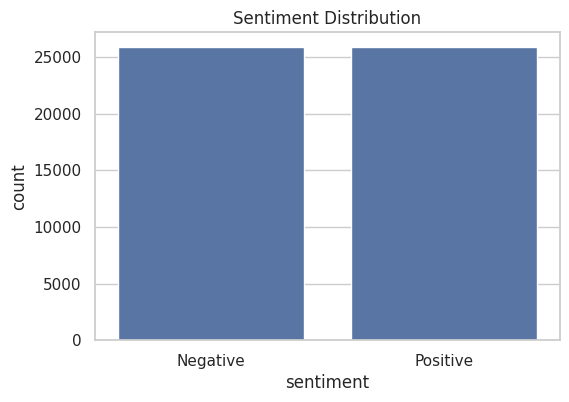

In [7]:
# Week 3: Visualizations
# Ensure 'sentiment' and 'clean_text' columns exist in dataset
if 'sentiment' not in df.columns:
    print("No 'sentiment' column found. Creating a placeholder by mapping 'label' or similar if present.")
    # try common alternatives
    for alt in ['label','polarity','Sentiment']:
        if alt in df.columns:
            df['sentiment'] = df[alt]
            break

# sentiment distribution
if 'sentiment' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
    plt.title('Sentiment Distribution')
    plt.show()
else:
    print("Sentiment column not present - skipping distribution plot.")

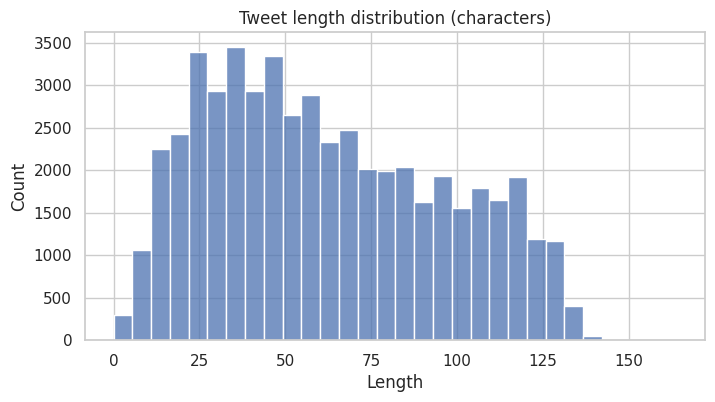

In [8]:
# Text length distribution
df['text_len'] = df['clean_text'].astype(str).apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['text_len'].dropna(), bins=30)
plt.title('Tweet length distribution (characters)')
plt.xlabel('Length')
plt.show()

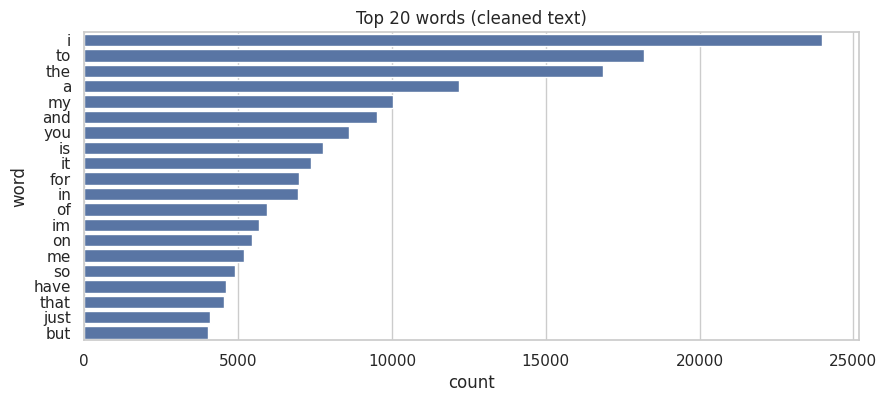

In [9]:
# Word frequency (top 20) from clean_text
from collections import Counter
all_words = " ".join(df['clean_text'].astype(str).tolist()).split()
most_common = Counter(all_words).most_common(20)
most_common_df = pd.DataFrame(most_common, columns=['word','count'])
plt.figure(figsize=(10,4))
sns.barplot(x='count', y='word', data=most_common_df)
plt.title('Top 20 words (cleaned text)')
plt.show()

## Week 4 — Statistics & Correlation

**Goals:** Basic descriptive statistics and simple correlation analysis (where applicable).

In [10]:
# Week 4: Descriptive statistics
print(df.describe(include='all').transpose().head(20))

              count unique                        top   freq       mean  \
Unnamed: 0  51800.0    NaN                        NaN    NaN    25900.5   
Sentiment     51800      2                   Negative  25900        NaN   
Text          51800  51629  isPlayer Has Died! Sorry       8        NaN   
clean_text    51800  50742                               101        NaN   
sentiment     51800      2                   Negative  25900        NaN   
text_len    51800.0    NaN                        NaN    NaN  61.845618   

                     std  min       25%      50%       75%      max  
Unnamed: 0  14953.516309  1.0  12950.75  25900.5  38850.25  51800.0  
Sentiment            NaN  NaN       NaN      NaN       NaN      NaN  
Text                 NaN  NaN       NaN      NaN       NaN      NaN  
clean_text           NaN  NaN       NaN      NaN       NaN      NaN  
sentiment            NaN  NaN       NaN      NaN       NaN      NaN  
text_len       34.017373  0.0      33.0     57.0      

Unique sentiment labels: ['Negative', 'Positive']
Mapping used: {'Negative': -1, 'Positive': 1}
            text_len  sentiment_num
sentiment                          
Negative   63.593050           -1.0
Positive   60.098185            1.0


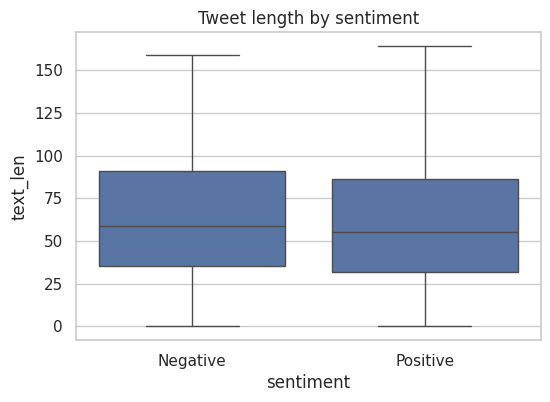

In [11]:
# Correlation example: text length vs sentiment (if sentiment ordinal)
if 'sentiment' in df.columns:
    # try to map sentiment to ordinal if possible
    mapping = {}
    unique_vals = list(df['sentiment'].dropna().unique())
    print("Unique sentiment labels:", unique_vals[:10])
    # naive mapping if labels look like 'positive','negative','neutral'
    lower = [str(x).lower() for x in unique_vals]
    if any('pos' in s for s in lower) and any('neg' in s for s in lower):
        mapping = {k: (1 if 'pos' in str(k).lower() else (-1 if 'neg' in str(k).lower() else 0)) for k in unique_vals}
        df['sentiment_num'] = df['sentiment'].map(mapping)
        print("Mapping used:", mapping)
        print(df[['text_len','sentiment','sentiment_num']].groupby('sentiment').mean())
        plt.figure(figsize=(6,4))
        sns.boxplot(x='sentiment', y='text_len', data=df)
        plt.title('Tweet length by sentiment')
        plt.show()
    else:
        print("Sentiment labels are not simple positive/negative; manual mapping may be required.")

## Week 5 — Regression (Concept Demo)

**Goals:** Show a simple regression example (tweet length predicting sentiment score) as a conceptual demo.

In [12]:
# Week 5: Simple regression demo (if 'sentiment_num' exists)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

if 'sentiment_num' in df.columns:
    X = df[['text_len']].fillna(0).values
    y = df['sentiment_num'].fillna(0).values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    preds = reg.predict(X_test)
    print("MSE:", mean_squared_error(y_test, preds))
else:
    print("No numeric sentiment available — regression demo skipped.")

MSE: 0.9968076383534078


## Week 6 — Classification (Classic ML)

**Goals:** Train and compare classic classifiers: Logistic Regression, Multinomial Naive Bayes, Random Forest.

In [13]:
# Week 6: Feature extraction (TF-IDF) and classic ML models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Use a small subset to speed up demo if dataset large
sample_df = df.sample(n=min(5000, len(df)), random_state=42).reset_index(drop=True)

tfv = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tfv.fit_transform(sample_df['clean_text'].astype(str))
if 'sentiment' in sample_df.columns:
    y = sample_df['sentiment']
else:
    y = np.where(sample_df['text_len']>sample_df['text_len'].median(), 'long','short')  # placeholder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LogisticRegression': LogisticRegression(max_iter=200),
    'NaiveBayes': MultinomialNB(),
    'RandomForest': RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name} accuracy: {acc:.4f}")

LogisticRegression accuracy: 0.7320
NaiveBayes accuracy: 0.7150
RandomForest accuracy: 0.6930


## Week 7 — Model Evaluation

**Goals:** Confusion matrix, precision, recall, F1-score, ROC (where applicable).

              precision    recall  f1-score   support

    Negative       0.74      0.71      0.73       502
    Positive       0.72      0.75      0.74       498

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



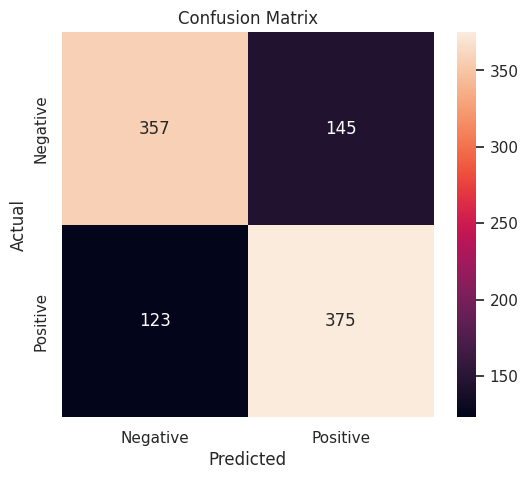

In [14]:
# Week 7: Evaluation for one chosen model (Logistic Regression)
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

two_feel_model = models['LogisticRegression']
preds = two_feel_model.predict(X_test)

print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds, labels=two_feel_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=two_feel_model.classes_, yticklabels=two_feel_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# *Sentiment Analysis on Twitter Data — 2nd Half | 8-15 Week Project*
This is the second half of the project. This includes advanced learning concepts and techniques.

## Week 8 — Unsupervised Learning

**Goals:** KMeans clustering on TF-IDF vectors and PCA/t-SNE visualization.

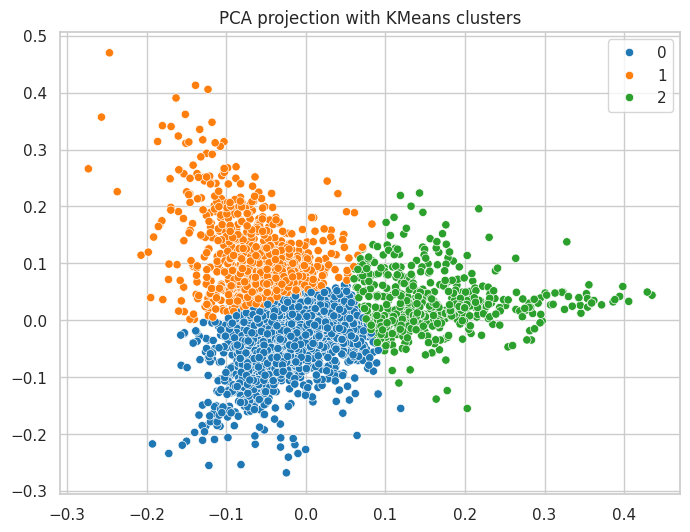

In [15]:
# Week 8: KMeans clustering and PCA visualization
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np # Import numpy

X_small = X.todense() if hasattr(X, 'todense') else X
X_small = np.asarray(X_small) # Convert to numpy array
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_small)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='tab10')
plt.title('PCA projection with KMeans clusters')
plt.show()

## Week 9 — ANN (Feedforward Neural Network)

**Goals:** Build a simple ANN using Keras, train, and evaluate.

In [16]:
# Week 9: ANN model (Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Use TF-IDF dense array (smaller features)
X_ann = X.toarray()[:2000]  # keep small to fit memory
y_ann = pd.factorize(y)[0][:2000].astype(float) # Convert labels to float

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

model_ann = Sequential([
    Dense(256, activation='relu', input_shape=(X_ann.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid') # Changed to 1 unit for binary classification
])

model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Changed loss to binary_crossentropy
model_ann.summary()

# Train (brief)
history = model_ann.fit(X_train_a, y_train_a, epochs=3, batch_size=64, validation_split=0.1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     1,280,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,313,281 (5.01 MB)

 Trainable params: 1,313,281 (5.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.5321 - loss: 0.6926 - val_accuracy: 0.6500 - val_loss: 0.6874
Epoch 2/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7737 - loss: 0.6643 - val_accuracy: 0.6750 - val_loss: 0.6478
Epoch 3/3
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8963 - loss: 0.5085 - val_accuracy: 0.6687 - val_loss: 0.5854


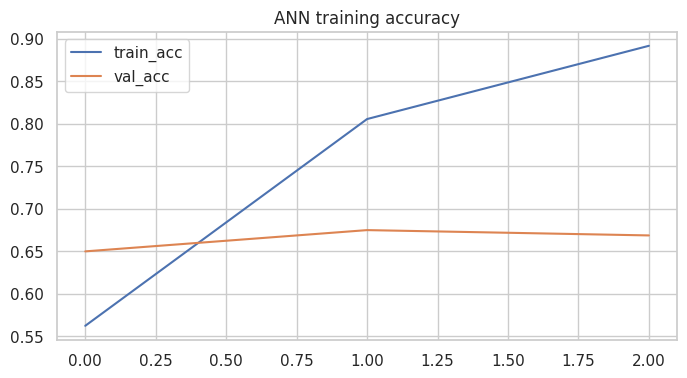

In [17]:
# Plot ANN training history
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('ANN training accuracy')
plt.legend()
plt.show()

## Week 10 — LSTM (Deep Learning for Text)

**Goals:** Tokenize text, create embeddings, train a Bi-LSTM model. GPU recommended.

In [18]:
# Week 10: LSTM pipeline (tokenize, pad, embedding, LSTM)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.models import Sequential
import pandas as pd # Import pandas
import numpy as np # Import numpy

# Use smaller subset for LSTM demo
texts = sample_df['clean_text'].astype(str).tolist()[:5000]
labels = pd.factorize(sample_df['sentiment'].astype(str).tolist()[:5000])[0].astype(float) # Convert labels to float

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

vocab_size = min(10000, len(tokenizer.word_index)+1)
embed_dim = 100

model_lstm = Sequential([
    Embedding(vocab_size, embed_dim, input_length=100),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') # Changed to 1 unit for binary classification
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Changed loss to binary_crossentropy
model_lstm.summary()

# Train briefly (GPU recommended)
history_lstm = model_lstm.fit(padded, labels, epochs=3, batch_size=64, validation_split=0.1)

/tmp/ipython-input-4277842896.py:11: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  labels = pd.factorize(sample_df['sentiment'].astype(str).tolist()[:5000])[0].astype(float) # Convert labels to float
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 234ms/step - accuracy: 0.5374 - loss: 0.6858 - val_accuracy: 0.6640 - val_loss: 0.6150
Epoch 2/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - accuracy: 0.7502 - loss: 0.5250 - val_accuracy: 0.7340 - val_loss: 0.5648
Epoch 3/3
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 254ms/step - accuracy: 0.8838 - loss: 0.3187 - val_accuracy: 0.7500 - val_loss: 0.6614


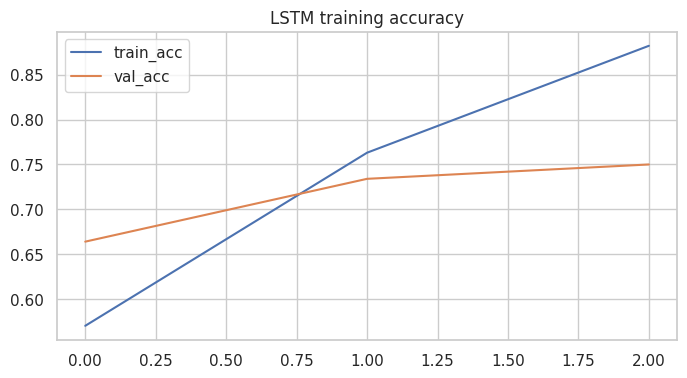

In [19]:
# Plot LSTM training history
plt.figure(figsize=(8,4))
plt.plot(history_lstm.history['accuracy'], label='train_acc')
plt.plot(history_lstm.history['val_accuracy'], label='val_acc')
plt.title('LSTM training accuracy')
plt.legend()
plt.show()

## Week 11 — NLP Pipeline (Tokenization, Stemming, Lemmatization, TF-IDF)

**Goals:** Explain and demonstrate each major NLP preprocessing step.

In [20]:
# Week 11: Demonstrate tokenization, stemming, lemmatization
import nltk
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

ps = PorterStemmer()
wnl = WordNetLemmatizer()
stop = set(stopwords.words('english'))

sample_text = """This is a sample tweet! It's great to learn cleaning: visit http://example.com :) #nlp @user"""
tokens = word_tokenize(basic_clean(sample_text))
print("Tokens:", tokens)
print("Stemmed:", [ps.stem(t) for t in tokens if t not in stop])
print("Lemmatized:", [wnl.lemmatize(t) for t in tokens if t not in stop])

Tokens: ['this', 'is', 'a', 'sample', 'tweet', 'its', 'great', 'to', 'learn', 'cleaning', 'visit', 'nlp']
Stemmed: ['sampl', 'tweet', 'great', 'learn', 'clean', 'visit', 'nlp']
Lemmatized: ['sample', 'tweet', 'great', 'learn', 'cleaning', 'visit', 'nlp']


## Week 12 — Case Study: Business & Policy Applications

**Goals:** Short write-up showing how tweet sentiment can inform marketing, public health, and policy decisions.

**Case study notes (example):**

- **Marketing:** Track product sentiment after campaign launches; identify spikes in negative sentiment.
- **Public Health:** Monitor vaccine hesitancy; detect misinformation hotspots.
- **Policy:** Gauge public reaction to policy announcements in real-time.

Include concrete outputs from prior sections (sentiment distribution, top negative words) to support the case study.


## Week 13 — Deployment (Flask / Streamlit demo)

**Goals:** Provide a simple Flask or Streamlit example to serve the model (prediction endpoint). I used StreamLit for deploying the demo.

In [21]:
# Week 13: Streamlit demo code (to run locally or on Streamlit cloud)
streamlit_demo = '''
import streamlit as st
import joblib
st.title("Tweet Sentiment Demo")
model = joblib.load('model.pkl')  # replace with your saved model
tfv = joblib.load('tfidf_vectorizer.pkl')
text = st.text_input("Enter tweet text:")
if st.button("Predict"):
    clean_text = text.lower()
    vec = tfv.transform([clean_text])
    pred = model.predict(vec)
    st.write("Predicted sentiment:", pred[0])
'''
print("Streamlit demo snippet (save as app.py):\n")
print(streamlit_demo)

Streamlit demo snippet (save as app.py):


import streamlit as st
import joblib
st.title("Tweet Sentiment Demo")
model = joblib.load('model.pkl')  # replace with your saved model
tfv = joblib.load('tfidf_vectorizer.pkl')
text = st.text_input("Enter tweet text:")
if st.button("Predict"):
    clean_text = text.lower()
    vec = tfv.transform([clean_text])
    pred = model.predict(vec)
    st.write("Predicted sentiment:", pred[0])



## Week 14 — Ethics & Explainability

**Goals:** Discuss bias, fairness, privacy; demo LIME or SHAP for model explainability.

In [22]:
# Week 14: LIME example (simple demonstration)
try:
    import lime
    from lime.lime_text import LimeTextExplainer
    explainer = LimeTextExplainer(class_names=two_feel_model.classes_)
    idx = 0
    text_to_explain = sample_df['clean_text'].iloc[idx]
    # Need to wrap the text in a list to make it a 2D input for predict_proba
    exp = explainer.explain_instance(text_to_explain, lambda x: two_feel_model.predict_proba(tfv.transform(x)), num_features=6)
    print("LIME explanation for a sample text:")
    print(exp.as_list())
except Exception as e:
    print("LIME not available or failed to run in this environment:", e)

LIME explanation for a sample text:
[(np.str_('training'), 0.0858356169918887), (np.str_('trying'), -0.05352289928270065), (np.str_('sun'), -0.053061296332439986), (np.str_('all'), -0.0471526789137787), (np.str_('through'), 0.0394908543242953), (np.str_('beach'), 0.03237920607544121)]


**Ethics notes to include in report:**
- Label bias and sampling bias in Twitter data
- Privacy considerations (do not expose personal user details)
- Potential misuse (targeting, surveillance)
- Recommendations: anonymize user info, audit models, document limitations


## Week 15 — Finalization & Report

**Goals:** Save final model, export cleaned dataset, organize repository files, write short report summary.

In [23]:
# Week 15: Save model and vectorizer (example using joblib)
import joblib
# Save the best classic model and TF-IDF vectorizer
joblib.dump(two_feel_model, 'two_feel_model.pkl')
joblib.dump(tfv, 'tfidf_vectorizer.pkl')
print("Models saved: two_feel_model.pkl, tfidf_vectorizer.pkl")

Models saved: two_feel_model.pkl, tfidf_vectorizer.pkl


## Project Summary

This project covered a comprehensive sentiment analysis workflow on Twitter data, structured into 15 sections:

1.  **Setup & Data (Weeks 1-2):** Installed libraries, loaded the dataset, and performed basic cleaning (removing URLs, mentions, etc.).
2.  **Exploratory Data Analysis (Weeks 3-4):** Visualized sentiment and text length distributions, analyzed word frequencies, and explored basic statistics and correlations.
3.  **Modeling (Weeks 5-10):** Demonstrated regression concepts and trained classic machine learning models (Logistic Regression, Naive Bayes, Random Forest) and deep learning models (ANN, LSTM) for classification.
4.  **NLP & Applications (Weeks 11-13):** Explored core NLP preprocessing steps (tokenization, stemming, lemmatization) and discussed potential business/policy applications and deployment strategies (Streamlit demo).
5.  **Ethics & Finalization (Weeks 14-15):** Covered ethical considerations and model explainability (LIME demo), and saved the final model and vectorizer.

Overall, the project progressed from data loading and cleaning to classic and deep learning model building, evaluation, unsupervised learning, NLP preprocessing, potential deployment, and ethical considerations.